In [1]:
#讀檔相關 (PA2已用過)
import os
import urllib.request 
import pandas as pd
import numpy as np

#SVM訓練相關
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#evaluation相關
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
# BERT相關
from keras_bert import extract_embeddings
from keras_bert import load_vocabulary
from keras_bert import Tokenizer

In [5]:
def index_2d(myList, v):
    for i, x in enumerate(myList):
        if v in x:
            return (i, x.index(v))

In [3]:
os.getcwd()

'/Users/wuyunwei/Desktop/碩二上/TM/PA3'

In [8]:
model_path = os.getcwd() + "/uncased_L-12_H-768_A-12"
dict_path = os.getcwd() + "/uncased_L-12_H-768_A-12/vocab.txt"

In [9]:
bert_token_dict = load_vocabulary(dict_path)
bert_tokenizer = Tokenizer(bert_token_dict)

In [3]:
documents = []
data_path = os.getcwd() + "/data/"
for i in range(1,1096):
    f = open(data_path + str(i)+'.txt', 'r')
    text = ""
    for line in f.readlines():
        text = text + (line.strip ('\n'))
    documents.append(text)
    f.close()
#print(len(documents))

In [11]:
embeddings = extract_embeddings(model_path, documents)

In [12]:
#print(len(embeddings))
#print(len(embeddings[0]))
#print(len(embeddings[0][0]))
#print(embeddings[0][0])

1095
379
768
[ 1.03948462e+00  1.32736355e-01  3.11212271e-01  1.30065978e-01
 -3.02166879e-01 -1.97313786e-01 -4.06274825e-01 -1.68459207e-01
 -1.33179531e-01  3.95210743e-01 -8.84482861e-01  3.47435176e-01
 -4.86092329e-01  4.84456494e-02  4.30262864e-01  9.61344168e-02
  3.23823839e-02 -6.10297695e-02  1.00069404e+00  1.60364881e-01
  6.25343740e-01 -9.80581790e-02  3.78990233e-01 -4.27817143e-02
  6.19700432e-01  7.10278377e-02  3.02796543e-01 -1.24017191e+00
 -5.06845236e-01  5.01507282e-01 -2.23473683e-02 -1.46548882e-01
  4.51703310e-01 -6.56047881e-01  1.36566430e-01  1.04092777e+00
  5.88564515e-01 -1.18914604e-01 -2.36045778e-01 -3.32842737e-01
  5.17041862e-01 -8.12072635e-01  3.46537530e-01 -2.48751849e-01
  6.50545120e-01  4.05502796e-01 -1.81663960e-01  6.06033742e-01
 -1.04891405e-01 -4.53448892e-01  3.55572224e-01 -7.84113884e-01
  1.30654633e+00  4.74160165e-01  1.13123953e-01 -1.06457718e-01
  5.23678958e-01  5.05462170e-01  1.99973941e-01 -1.15680307e-01
 -7.83320144

In [34]:
target_url = "https://ceiba.ntu.edu.tw/course/88ca22/content/training.txt" 
data = urllib.request.urlopen(target_url) # it's a file like object and works just like a file

train_ids = []
train_labels = []
for line in data:
    ids = str(line).split()[1:-1]
    ids = [int(id) for id in ids]
    train_ids += ids
    train_labels.append(ids)

In [35]:
train_label = []
train_embeddings = []
for i in range(1095):
    id = i+1
    if id in train_ids:
        label = index_2d(train_labels, id)[0] + 1
        train_label.append(label)
        temp_e = [sum(x)/len(embeddings[i]) for x in zip(*embeddings[i])]
        train_embeddings.append(temp_e)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train_embeddings, train_label, \
                                                  test_size=0.1, random_state=14)

In [37]:
model = SVC(kernel = 'linear',C = 1, probability = True)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [38]:
y_pred = model.predict(X_val)
y_probs = model.predict_proba(X_val)

In [39]:
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [40]:
train_label_B = label_binarize(train_label, classes=[*range(1,14)])

X_train, X_val, y_train, y_val = train_test_split(train_embeddings, train_label_B, \
                                                  test_size=0.1, random_state = 14)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


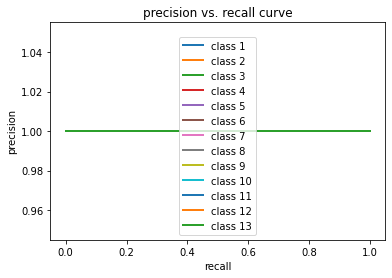

In [45]:
precision = dict()
recall = dict()
for i in range(13):
    precision[i], recall[i], _ = precision_recall_curve(y_val[:, i], y_probs[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i+1))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [46]:
df_pred = pd.read_csv("hw3_sam.csv")
df_pred

,Id,Value
0,17,0
1,18,0
2,20,0
3,21,0
4,22,0
...,...,...
895,1091,0
896,1092,0
897,1093,0
898,1094,0


In [50]:
for i in range(len(df_pred)):
    id = df_pred["Id"][i]
    temp_e = [sum(x)/len(embeddings[id-1]) for x in zip(*embeddings[id-1])]
    pred = model.predict([temp_e])
    df_pred["Value"][i] = pred

In [52]:
df_pred

,Id,Value
0,17,2
1,18,2
2,20,2
3,21,2
4,22,2
...,...,...
895,1091,6
896,1092,6
897,1093,6
898,1094,6


In [51]:
df_pred.to_csv("result_avg.csv", index = False)